# Introducción a Machine Learning

### Análisis de Componentes Principales

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

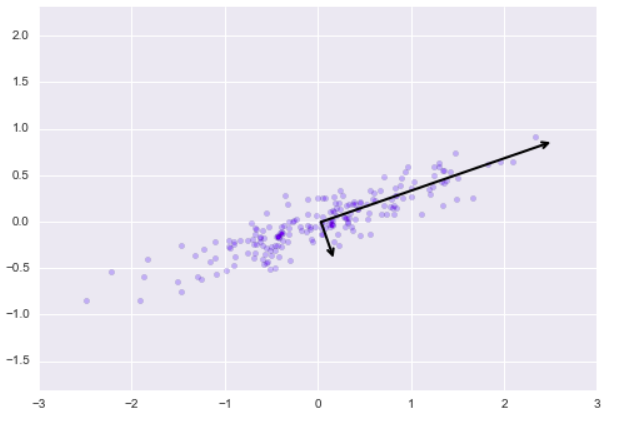

In [2]:
from IPython.display import Image
Image(filename='/content/drive/My Drive/Machine_Learning_Workshop_SMF/PCA_1.png') 

Tomada de In Depth: Principal Component Analysis https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html


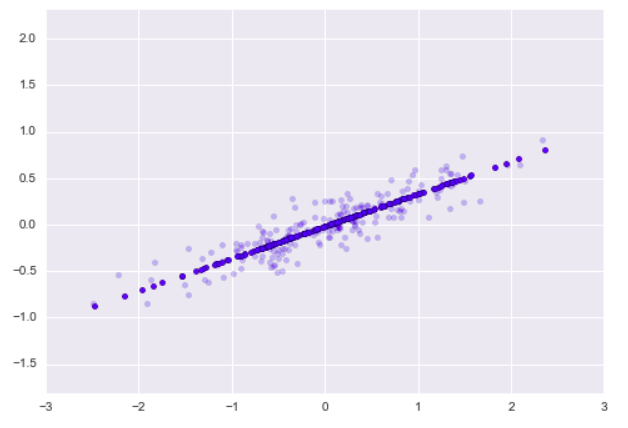

In [3]:
Image(filename='/content/drive/My Drive/Machine_Learning_Workshop_SMF/PCA_2.png') 

Tomada de In Depth: Principal Component Analysis https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html


array([[-0.30917158,  1.58327807],
       [-0.93960041,  1.77925961],
       [-0.54254697,  4.47284823],
       ...,
       [ 0.48356116, -1.99781536],
       [ 0.85849208, -1.55138565],
       [ 0.11985999, -0.44601592]])

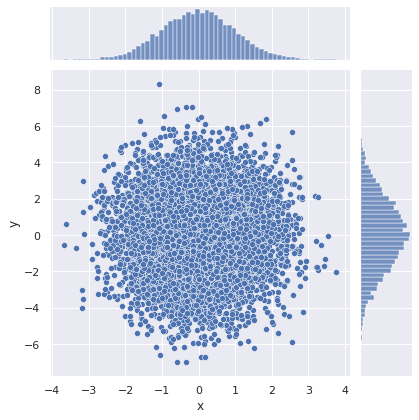

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
mu, sigma = 0, 1.0 # mean and standard deviation
x = np.random.normal(mu, sigma, 10000)
mu, sigma = 0, 2.0 # mean and standard deviation
y = np.random.normal(mu, sigma, 10000)

data = np.column_stack((x,y))
df = pd.DataFrame(data, columns=["x", "y"])

sns.jointplot(x="x", y="y", data=df);
data

In [5]:
# calculate the mean of each column
M = np.mean(data.T, axis=1)
print(M)

[-0.01037847  0.02285377]


In [ ]:
# center columns by subtracting column means
C = data - M
C=C.astype(np.float32)
# calculate covariance matrix of centered matrix
V = np.cov(C.T)
print(V)
# eigendecomposition of covariance matrix
values, vectors = np.linalg.eig(V)
print(vectors)
print(values)
# project data
P = vectors.T.dot(C.T)
#print(P.T)

[[0.97714082 0.00492119]
 [0.00492119 3.99031046]]
[[-0.99999867 -0.00163322]
 [ 0.00163322 -0.99999867]]
[0.97713279 3.9903185 ]


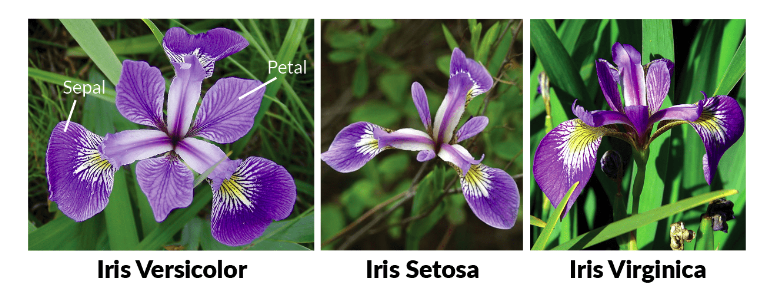

In [6]:
Image(filename='/content/drive/My Drive/Machine_Learning_Workshop_SMF/PCA_3.png') 

 Tomada de Machine Learning in R for beginners
  https://www.datacamp.com/community/tutorials/machine-learning-in-r

In [7]:
import plotly.express as px
df = px.data.iris()
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [8]:
print(list(df.columns) )
features=list(df.columns)[0:4]
print (features)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species', 'species_id']
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [9]:
fig = px.scatter_matrix(
    df,
    dimensions=features,
    color="species"
)
fig.show()

In [10]:
fig = px.scatter_3d(df, x='petal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

In [11]:
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
                    color='petal_length', symbol='species')
fig.show()

In [ ]:
df.to_numpy()[0:10]

array([[5.1, 3.5, 1.4, 0.2, 'setosa', 1],
       [4.9, 3.0, 1.4, 0.2, 'setosa', 1],
       [4.7, 3.2, 1.3, 0.2, 'setosa', 1],
       [4.6, 3.1, 1.5, 0.2, 'setosa', 1],
       [5.0, 3.6, 1.4, 0.2, 'setosa', 1],
       [5.4, 3.9, 1.7, 0.4, 'setosa', 1],
       [4.6, 3.4, 1.4, 0.3, 'setosa', 1],
       [5.0, 3.4, 1.5, 0.2, 'setosa', 1],
       [4.4, 2.9, 1.4, 0.2, 'setosa', 1],
       [4.9, 3.1, 1.5, 0.1, 'setosa', 1]], dtype=object)

In [13]:
import numpy as np
X=df.to_numpy()[:,0:4]
np.shape(X)

(150, 4)

In [14]:
# calculate the mean of each column
M = np.mean(X.T, axis=1)
print(M)

[5.843333333333335 3.0540000000000007 3.7586666666666693
 1.1986666666666672]


In [15]:
# center columns by subtracting column means
C = X - M
C=C.astype(np.float32)
# calculate covariance matrix of centered matrix
V = np.cov(C.T)
print(V)
# eigendecomposition of covariance matrix
values, vectors = np.linalg.eig(V)
print(vectors)
print(values)
# project data
P = vectors.T.dot(C.T)
#print(P.T)

[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171276 -0.11798121]
 [ 1.27368233 -0.32171276  3.11317945  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241431]]
[[ 0.36158967 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641808 -0.32409436]
 [ 0.85657211  0.17576741  0.07252407 -0.47971898]
 [ 0.35884392  0.07470646  0.54906092  0.75112056]]
[4.22484079 0.24224357 0.07852391 0.02368303]


In [16]:
fig = px.scatter(x=P.T[:,0], y=-P.T[:,1],color=df['species']  )
fig.show()

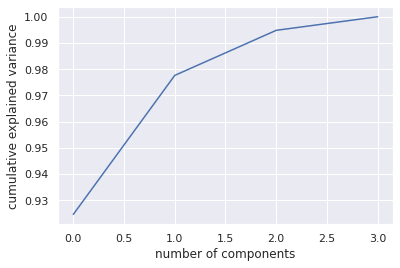

In [18]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(values)/sum(values))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid('ON')

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(C)
print(pca.components_)
print(pca.explained_variance_)


[[ 0.36158973 -0.08226889  0.8565721   0.35884392]
 [ 0.65654     0.72971225 -0.17576748 -0.07470641]
 [-0.5809975   0.59641826  0.07252437  0.5490604 ]
 [ 0.31725407 -0.324094   -0.4797189   0.7511209 ]]
[4.2248406  0.24224369 0.0785239  0.02368303]


In [ ]:
X_PCA=pca.transform(C)
fig = px.scatter(x=X_PCA[:,0], y=X_PCA[:,1]  ,  color=df['species'])
fig.show()

In [20]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
digits = load_digits()
X = np.array(digits.data)
y = np.array(digits.target)
print(np.shape(X),np.shape(y))


(1797, 64) (1797,)


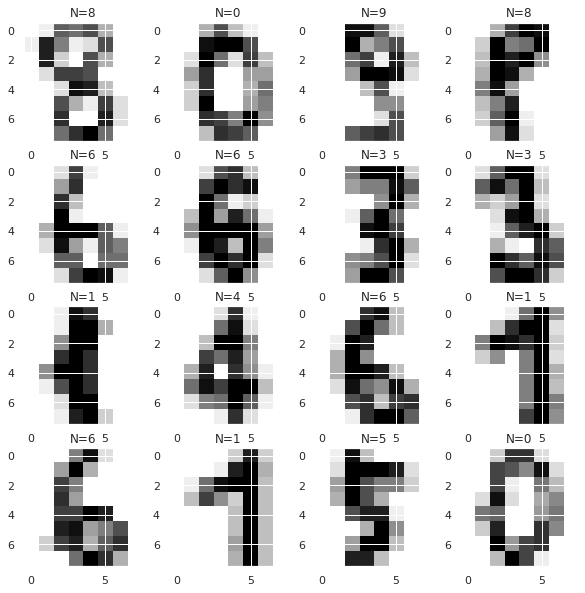

In [21]:
import matplotlib.pyplot as plt
from random import randint
fig=plt.figure(figsize=(10, 10))
for i in range(16):
    fig.add_subplot(4, 4, i+1)
    j = randint(0, len(y))
    plt.imshow(np.reshape(X[j],(8,8)),cmap=plt.cm.gray_r, interpolation='nearest')
    num = str(y[j])
    plt.title('N='+str(num))

In [22]:
pca = PCA(64)  # project from 64 to 3 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)
print(digits.target.shape)

(1797, 64)
(1797, 64)
(1797,)


In [23]:
fig = px.scatter_3d(df, x=projected[:,0], y=projected[:,1], z=projected[:,2],
                   symbol=digits.target,color=digits.target  )
fig.update_traces(marker=dict(size=2,
                              ),
                  selector=dict(mode='markers'))
fig.show()

In [24]:
fig = px.line(x=range(len(pca.explained_variance_)),y=np.cumsum(pca.explained_variance_)/sum(pca.explained_variance_))

fig.show()
s=0
for i in range(len(pca.explained_variance_)):
  s=s+pca.explained_variance_[i]/sum(pca.explained_variance_)
  if s >= .9:
    break
print('Numero de componentes =',i+1)


Numero de componentes = 21


In [25]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
digits = load_digits()
X = np.array(digits.data)
y = np.array(digits.target)
print(np.shape(X),np.shape(y))

(1797, 64) (1797,)


In [26]:
%%time
import plotly.express as px
tsne = TSNE(n_components=3, random_state=0)

projected = tsne.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)
print(digits.target.shape)
fig = px.scatter_3d(x=projected[:,0], y=projected[:,1], z=projected[:,2],
                   symbol=digits.target,color=digits.target  )
fig.update_traces(marker=dict(size=2,
                              ),
                  selector=dict(mode='markers'))
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



(1797, 64)
(1797, 3)
(1797,)


CPU times: user 1min 23s, sys: 229 ms, total: 1min 23s
Wall time: 44.8 s


In [27]:
%%time
import plotly.express as px
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
projected = tsne.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)
print(digits.target.shape)
fig = px.scatter(x=projected[:,0], y=projected[:,1],color=digits.target  )
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



(1797, 64)
(1797, 2)
(1797,)


CPU times: user 24.1 s, sys: 366 ms, total: 24.5 s
Wall time: 12.6 s


In [28]:
import plotly.express as px
import numpy as np
df = px.data.iris()
X=df.to_numpy()[:,0:4]
y=df.to_numpy()[:,5]

print(np.shape(X),np.shape(y))

(150, 4) (150,)


In [29]:
tsne = TSNE(n_components=2, random_state=0)
projected = tsne.fit_transform(X)
print(X.shape)
print(projected.shape)
print(y.shape)
fig = px.scatter(df, x=projected[:,0], y=projected[:,1],color=df['species'])
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



(150, 4)
(150, 2)
(150,)


11501568/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


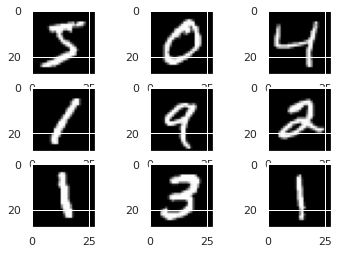

In [30]:
from keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [31]:
%%time
import plotly.express as px
import numpy as np
from sklearn.manifold import TSNE

X = np.reshape(trainX,(60000,784))
X=X[0:4000,:]
y=trainy[0:4000]
print(np.shape(X),np.shape(y))
tsne = TSNE(n_components=2, random_state=0)
projected = tsne.fit_transform(X)
fig = px.scatter(x=projected[:,0], y=projected[:,1],color=y  )
fig.show()

(4000, 784) (4000,)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



CPU times: user 1min 1s, sys: 617 ms, total: 1min 2s
Wall time: 32.1 s


Mounted at /content/drive


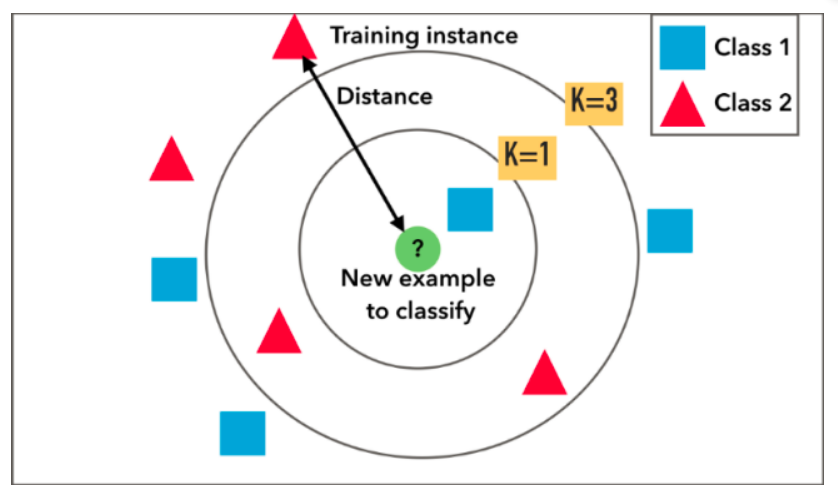

In [ ]:
from IPython.display import Image
from google.colab import drive
drive.mount("/content/drive")
Image(filename='/content/drive/My Drive/Machine_Learning_Workshop_SMF/KNN_1.png') 

Tomado de Machine Learning with K-Nearest Neighbor (K-NN) https://medium.com/@adetulatolu/machine-learning-with-k-nearest-neighbor-k-nn-13ec0ef92551


Mounted at /content/drive


In [32]:
from sklearn import datasets
import numpy as np
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from random import randint

train_fraction = .8
train_len = int(train_fraction*len(X))
print ('Fraccion train:',train_fraction)

digits = datasets.load_digits()
X = np.array(digits.data)
Y = np.array(digits.target)

X_train = X[0:train_len]
Y_train = Y[0:train_len]
X_test = X[train_len:]
Y_test = Y[train_len:]

print ('Data shape:',X.shape)
print ('X_train shape:',X_train.shape)
print ('Y_train shape:',Y_train.shape)
print ('X_test shape:',X_test.shape)
print ('Y_test shape:',Y_test.shape)

Fraccion train: 0.8
Data shape: (1797, 64)
X_train shape: (1797, 64)
Y_train shape: (1797,)
X_test shape: (0, 64)
Y_test shape: (0,)


[ 0.  2. 13. 16. 16. 11.  0.  0.  0. 10. 11.  4. 12. 12.  0.  0.  0.  1.
  1.  4. 14.  8.  0.  0.  0.  0.  2. 16. 16.  8.  0.  0.  0.  0.  0.  7.
  9. 16.  8.  0.  0.  0.  0.  0.  0. 10. 12.  0.  0.  0.  5.  9. 10. 16.
  9.  0.  0.  0. 15. 16. 13.  7.  0.  0.] 2


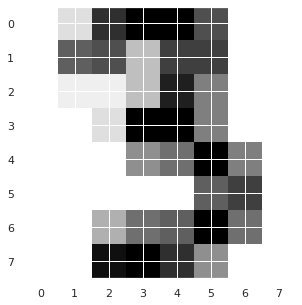

In [33]:
j = randint(0, len(y))
fig=plt.figure(figsize=(5, 5))

plt.imshow(np.reshape(X[j],(8,8)),cmap=plt.cm.gray_r, interpolation='nearest')

print(X[j],y[j])

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
import sklearn
for k in range(1,10):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)

    score = np.round(100*model.score(X_test, Y_test),1)
    print ('k=',k,'Porcentaje de aciertos:',score)


ValueError: ignored

IndexError: ignored

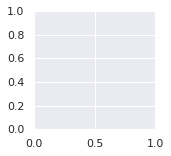

In [35]:
fig=plt.figure(figsize=(10, 10))
for i in range(16):
    fig.add_subplot(4, 4, i+1)
    j = randint(0, len(Y_test))
    plt.imshow(np.reshape(X_test[j],(8,8)),cmap=plt.cm.gray_r, interpolation='nearest')
    num_predicho = str(model.predict(X_test)[j])
    num_real = str(Y_test[j])
    plt.title('Real '+num_real +' Predicho '+num_predicho)

In [ ]:
from sklearn.metrics import confusion_matrix
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, Y_train)
confusion_matrix(Y_test, model.predict(X_test))


array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 33,  0,  1,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  1, 30,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  0, 34]])

El no. de columna es el valor del digito y el numero de fila es el valor de la prediccion. 
